In [1652]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50)

pd.read_csv('stud_math.xls')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
# Задача - выявить факторы отрицательно и положительно влияющие на успеваемость. 

In [1653]:
# Смотрим общую информацию о данных датасета
# 13 числовых переменных и 17 номинативных
study = pd.read_csv('stud_math.xls')
display(study.head())
study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1654]:
study.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [1655]:
# количество пропусков по столбцам в %, пропусков не много.
for col in study.columns:
    pct_missing = study[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime, granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%


In [1656]:
# номинальное количество пропусков
null_data = study.isnull().sum()
null_data[null_data>0]

address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [ ]:
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

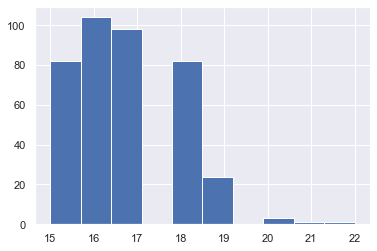

In [1657]:
# займемся числовыми столбцами
# посмотрим на распределение по возрасту

study.age.hist()
study.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


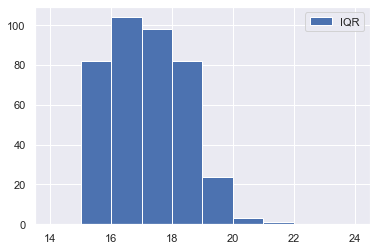

In [1658]:
# Проверка на выбросы показывает наличие выброса. Пусть остается так как это фактические данные
IQR = study.age.quantile(0.75) - study.age.quantile(0.25)
perc25 = study.age.quantile(0.25)
perc75 = study.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.age.loc[study.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (14, 24), label = 'IQR')
 
plt.legend();

In [1659]:
display(pd.DataFrame(study.age.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.age.value_counts()>10).sum())
study.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

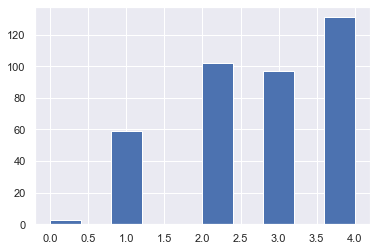

In [1660]:
# распределение по образованию матери
study.Medu.hist()
study.Medu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


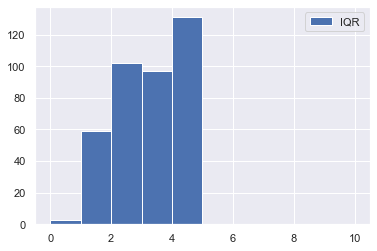

In [1661]:
# Выбросов нет
IQR = study.Medu.quantile(0.75) - study.Medu.quantile(0.25)
perc25 = study.Medu.quantile(0.25)
perc75 = study.Medu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.Medu.loc[study.Medu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();


In [1499]:
#study['Medu'].value_counts().index

In [1500]:
# заменим пропуски одним значением
 
#study['Medu'].fillna(study['Medu'].value_counts().index[0], inplace = True)


In [1662]:
# удалим пропуски
study = study[pd.notnull(study['Medu'])]

In [1663]:
display(pd.DataFrame(study.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.Medu.value_counts()>10).sum())
study.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    368.000000
mean       2.619565
std        2.235909
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

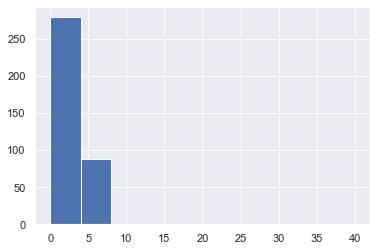

In [1664]:
# распределение по образованию отца
# есть ошибка в данных
study.Fedu.hist()
study.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


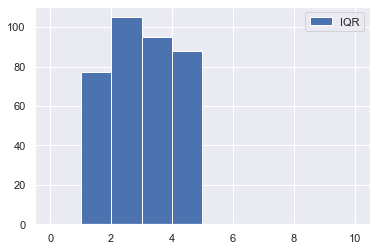

In [1665]:
IQR = study.Fedu.quantile(0.75) - study.Fedu.quantile(0.25)
perc25 = study.Fedu.quantile(0.25)
perc75 = study.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.Fedu.loc[study.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();


In [1666]:

study['Fedu'].value_counts().index

Float64Index([2.0, 3.0, 4.0, 1.0, 0.0, 40.0], dtype='float64')

In [1667]:
# заменим пропуски одним значением
# study['Fedu'].fillna(study['Fedu'].value_counts().index[0], inplace = True)

In [1668]:
# Отфильтруем ошибку - возьмем только те значения, которые встречаются чаще 1 раза
display(pd.DataFrame(study.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 1 раз:"
      , (study.Fedu.value_counts()>1).sum())
        
study.loc[:, ['Fedu']].info()

,Fedu
2.0,105
3.0,95
4.0,88
1.0,77
0.0,2
40.0,1


Значений, встретившихся в столбце более 1 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    368 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    364.000000
mean       1.442308
std        0.695892
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

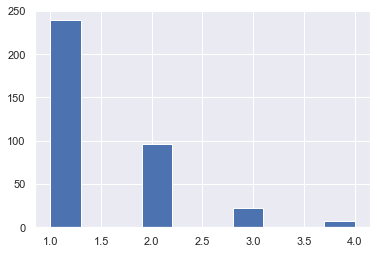

In [1669]:
# распределение по времени в пути до школы
study.traveltime.hist()
study.traveltime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


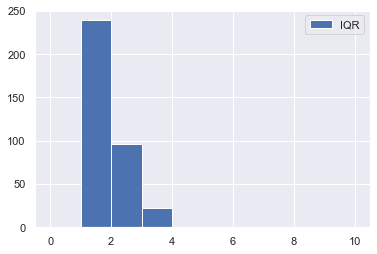

In [1670]:
# Показывает наличие выбросов, но это фактические данные, поэтому отфильтровывать не будем.

IQR = study.traveltime.quantile(0.75) - study.traveltime.quantile(0.25)
perc25 = study.traveltime.quantile(0.25)
perc75 = study.traveltime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.traveltime.loc[study.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1671]:

# Заполним пропуски константой
 
#study['traveltime'].fillna(1.0, inplace = True)

In [1672]:
display(pd.DataFrame(study.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.traveltime.value_counts()>10).sum())
study.loc[:, ['traveltime']].info()

,traveltime
1.0,239
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  364 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    385.000000
mean       2.041558
std        0.843688
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

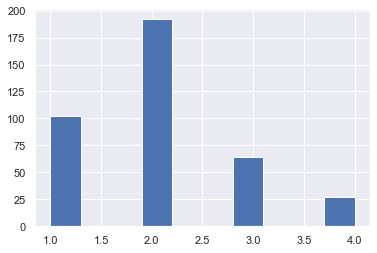

In [1673]:
# распределение по времени на учебу помимо школы
study.studytime.hist()
study.studytime.describe()

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


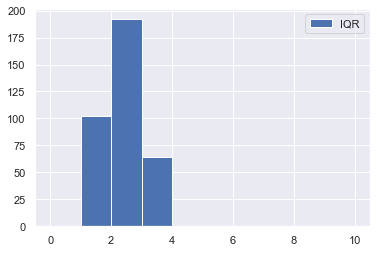

In [1674]:
# Проверим на выбросы. 
# Показывает наличие выбросов, но это фактические данные, поэтому отфильтровывать не будем.

IQR = study.studytime.quantile(0.75) - study.studytime.quantile(0.25)
perc25 = study.studytime.quantile(0.25)
perc75 = study.studytime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.studytime.loc[study.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1675]:
# Заполним пропуски константой
#study['studytime'].fillna(2.0, inplace = True)

In [1676]:
display(pd.DataFrame(study.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.studytime.value_counts()>10).sum())
study.loc[:, ['studytime']].info()

,studytime
2.0,192
1.0,102
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    370.000000
mean       0.337838
std        0.744938
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

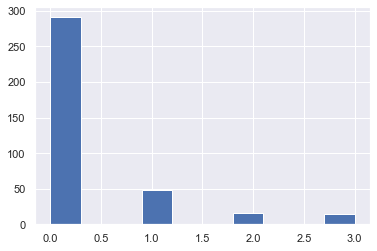

In [1677]:
# распределение по количеству внеучебных неудач
study.failures.hist()
study.failures.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


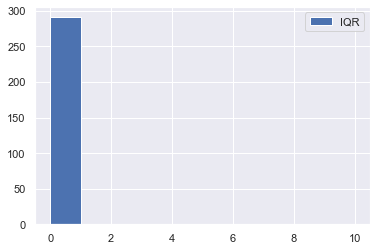

In [1678]:
# Проверим на выбросы. 
# Показывает наличие выбросов, но это фактические данные, поэтому отфильтровывать не будем.

IQR = study.failures.quantile(0.75) - study.failures.quantile(0.25)
perc25 = study.failures.quantile(0.25)
perc75 = study.failures.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.failures.loc[study.failures.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1679]:
# Заполним пропуски константой
#study['failures'].fillna(0.0, inplace = True)

In [1680]:
display(pd.DataFrame(study.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.failures.value_counts()>10).sum())
study.loc[:, ['famrel']].info()

,failures
0.0,291
1.0,48
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    385.000000
mean      -6.124675
std        2.531065
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

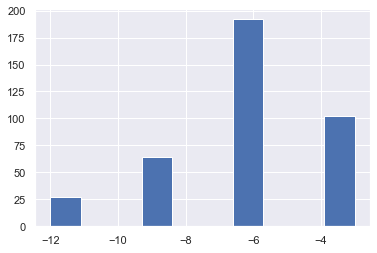

In [1681]:
# распределение признака времени на учебу помимо школы в неких баллах
study['studytime, granular'].hist()
study['studytime, granular'].describe()

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


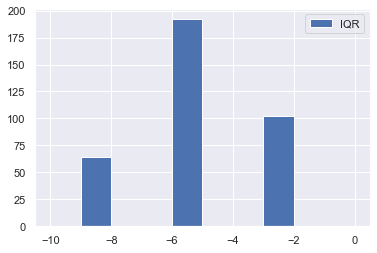

In [1682]:

# Проверим на выбросы. 
# Показывает наличие выбросов, но это фактические данные, поэтому отфильтровывать не будем.

IQR = study['studytime, granular'].quantile(0.75) - study['studytime, granular'].quantile(0.25)
perc25 = study['studytime, granular'].quantile(0.25)
perc75 = study['studytime, granular'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study['studytime, granular'].loc[study['studytime, granular'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (-10, 0), label = 'IQR')
 
plt.legend();

In [1683]:
# Заполним пропуски константой
#study['studytime, granular'].fillna(-6.0, inplace = True)

In [1684]:
display(pd.DataFrame(study['studytime, granular'].value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study['studytime, granular'].value_counts()>10).sum())
study.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,192
-3.0,102
-9.0,64
-12.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    365.000000
mean       3.936986
std        0.928118
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

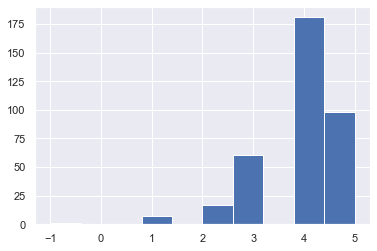

In [1685]:
# распределение по признаку - семейные отношения
# присутствует ошибка в данных -1

study.famrel.hist()
study.famrel.describe()

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


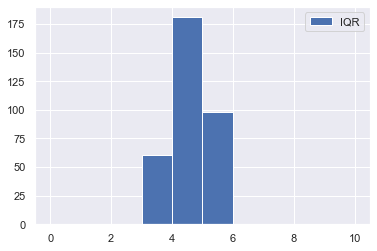

In [1525]:
# Проверим на выбросы. 
# Показывает наличие выбросов.

IQR = study.famrel.quantile(0.75) - study.famrel.quantile(0.25)
perc25 = study.famrel.quantile(0.25)
perc75 = study.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.famrel.loc[study.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1526]:
# Заполним пропуски константой
#study['famrel'].fillna(4.0, inplace = True)

In [1686]:

# отфильтруем ошибку
display(pd.DataFrame(study.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.famrel.value_counts()>10).sum())
study.loc[:, ['famrel']].info()

,famrel
4.0,181
5.0,98
3.0,61
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    381.000000
mean       3.228346
std        0.993577
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

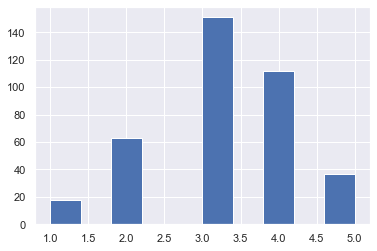

In [1687]:
# распределение по свободному времени после школы

study.freetime.hist()
study.freetime.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


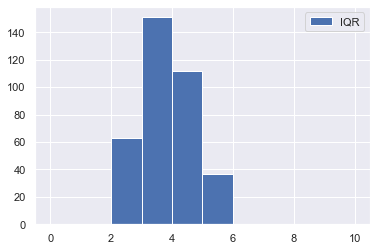

In [1688]:
# Проверим на выбросы 
# Выбросы есть, фильтровать не будем

IQR = study.freetime.quantile(0.75) - study.freetime.quantile(0.25)
perc25 = study.freetime.quantile(0.25)
perc75 = study.freetime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.freetime.loc[study.freetime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1689]:
# Заполним пропуски константой
#study['freetime'].fillna(3.0, inplace = True)

In [1690]:
display(pd.DataFrame(study.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      
      , (study.freetime.value_counts()>10).sum())
study.loc[:, ['freetime']].info()

,freetime
3.0,151
4.0,112
2.0,63
5.0,37
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    385.000000
mean       3.106494
std        1.116442
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

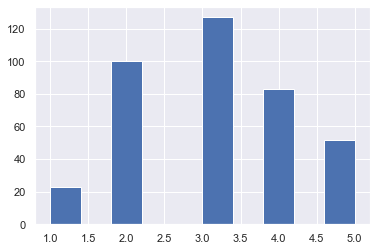

In [1691]:
# распределение по времени с друзьями

study.goout.hist()
study.goout.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


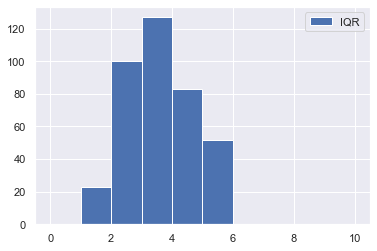

In [1692]:
# Проверим на выбросы 
# Выбросов нет

IQR = study.goout.quantile(0.75) - study.goout.quantile(0.25)
perc25 = study.goout.quantile(0.25)
perc75 = study.goout.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.goout.loc[study.goout.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1534]:
# study = study[pd.notnull(study['goout'])]

In [1535]:
# Заполним пропуски константой
#study['goout'].fillna(3.0, inplace = True)

In [1693]:
display(pd.DataFrame(study.goout.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.goout.value_counts()>10).sum())
study.loc[:, ['goout']].info()

,goout
3.0,127
2.0,100
4.0,83
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    377.000000
mean       3.535809
std        1.395058
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

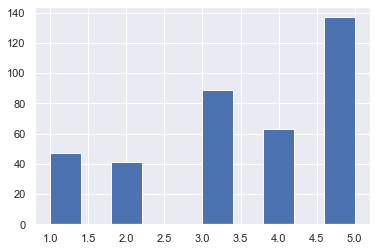

In [1694]:
# распределение по состоянию здоровья

study.health.hist()
study.health.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


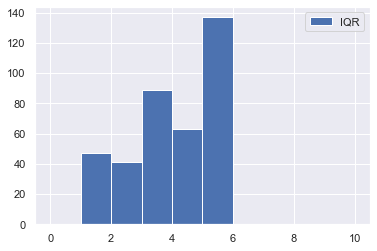

In [1695]:
# Проверим на выбросы 
# Выбросов нет

IQR = study.health.quantile(0.75) - study.health.quantile(0.25)
perc25 = study.health.quantile(0.25)
perc75 = study.health.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.health.loc[study.health.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1539]:
# Заполним пропуски константой
#study['health'].fillna(5.0, inplace = True)

count    377.000000
mean       3.535809
std        1.395058
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

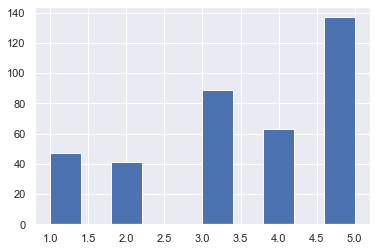

In [1696]:
# изменение распределения по состоянию здоровья

study.health.hist()
study.health.describe()

In [1541]:
display(pd.DataFrame(study.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.health.value_counts()>10).sum())
study.loc[:, ['health']].info()

,health
5.0,137
3.0,89
4.0,63
1.0,47
2.0,41


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    380.000000
mean       7.305263
std       23.554271
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

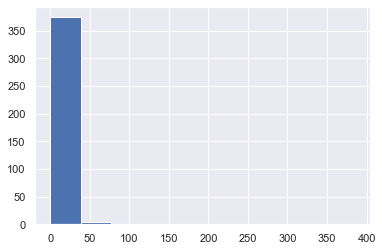

In [1697]:
# распределение по количеству пропущеных занятий

study.absences.hist()
study.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


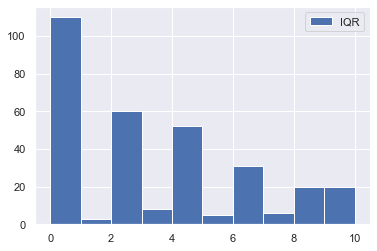

In [1698]:
# Проверим на выбросы 
# выбросов нет
IQR = study.absences.quantile(0.75) - study.absences.quantile(0.25)
perc25 = study.absences.quantile(0.25)
perc75 = study.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
study.absences.loc[study.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [1544]:
# Заполним пропуски константой
# study.absences.fillna(0.0, inplace = True)

In [1699]:
display(pd.DataFrame(study.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.absences.value_counts()>10).sum())
study.loc[:, ['absences']].info()

,absences
0.0,110
2.0,60
4.0,52
6.0,31
8.0,20
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    386.000000
mean      52.461140
std       22.824111
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

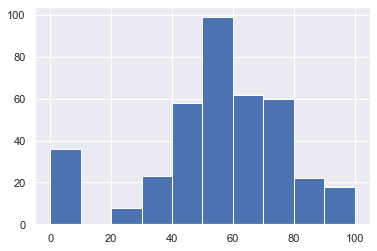

In [1700]:
# распределение по баллам госэкзамена по математике

study.score.hist()
study.score.describe()

In [1701]:
# удалим пропуски
study= study[study['score'].notna()]

In [1702]:
# Посмотрим на сколько изменилось распределение признаков
# Изменилось не столь сильно, уменьшилось количество строк за счет удаления неопределенностей по экзаменам
study.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,386.000000,386.000000,362.000000,358.000000,379.000000,364.000000,379.000000,359.000000,377.000000,380.000000,371.000000,375.000000,386.000000
mean,16.673575,2.766839,2.632597,1.438547,2.039578,0.326923,-6.118734,3.930362,3.220159,3.094737,3.533693,7.346667,52.461140
std,1.267855,1.094277,2.249121,0.694412,0.848912,0.731232,2.546736,0.932437,0.992963,1.116664,1.401089,23.706366,22.824111
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


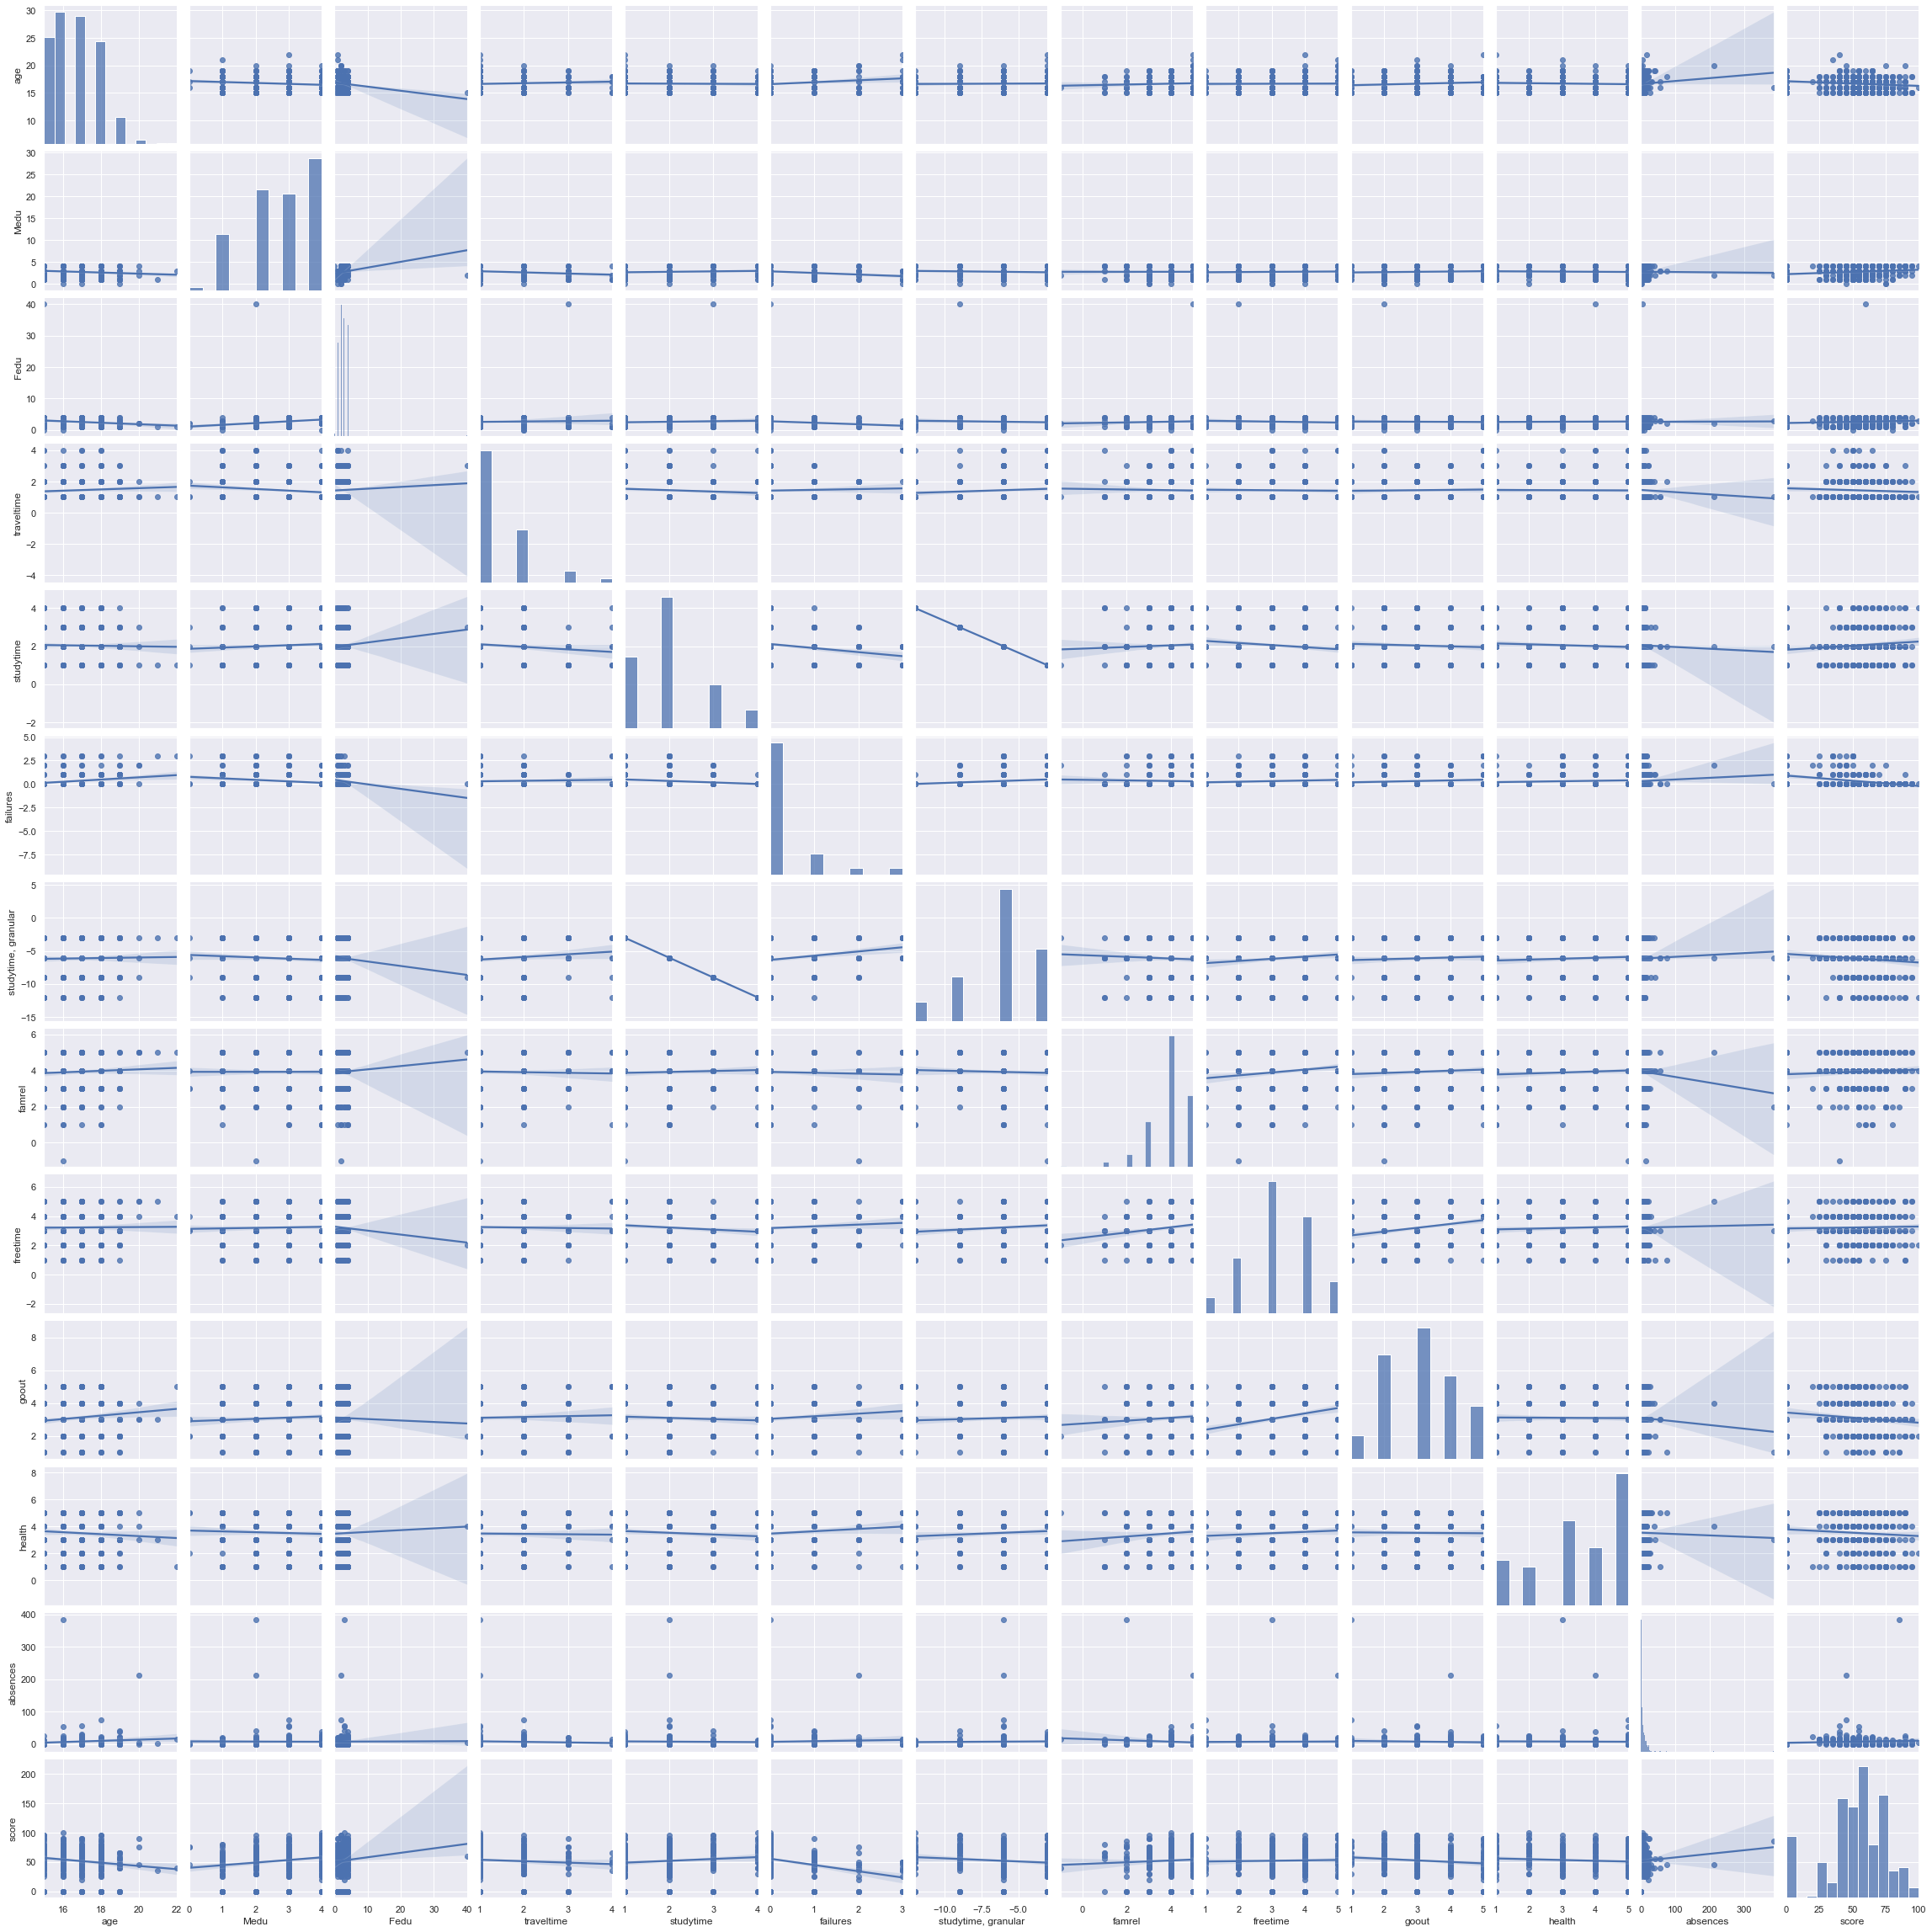

In [1703]:
# проведем корреляционный анализ
# Видна отрицательная корреляция между stadYtime и stadytime, granular
sns.pairplot(study, kind = 'reg')

In [1704]:
# Используем для наглядности матрицу корреляций 
# studytime и studytime, granular

study.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132626,0.073352,-0.019964,0.202771,0.019964,0.056025,0.010533,0.118002,-0.065555,0.097559,-0.152580
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.132626,0.270754,1.000000,0.037497,0.060251,-0.150394,-0.060251,0.044679,-0.061616,-0.018267,0.021415,0.003234,0.075591
traveltime,0.073352,-0.165838,0.037497,1.000000,-0.108683,0.050026,0.108683,-0.027114,-0.024109,0.032349,-0.013659,-0.049144,-0.077475
studytime,-0.019964,0.081032,0.060251,-0.108683,1.000000,-0.184126,-1.000000,0.046794,-0.126436,-0.057161,-0.076424,-0.025733,0.116227
failures,0.202771,-0.240319,-0.150394,0.050026,-0.184126,1.000000,0.184126,-0.039338,0.086988,0.104813,0.091464,0.058935,-0.343361
"studytime, granular",0.019964,-0.081032,-0.060251,0.108683,-1.000000,0.184126,1.000000,-0.046794,0.126436,0.057161,0.076424,0.025733,-0.116227
famrel,0.056025,0.000602,0.044679,-0.027114,0.046794,-0.039338,-0.046794,1.000000,0.169196,0.074258,0.081019,-0.082188,0.062462
freetime,0.010533,0.038265,-0.061616,-0.024109,-0.126436,0.086988,0.126436,0.169196,1.000000,0.293827,0.070361,0.012208,0.029552
goout,0.118002,0.072320,-0.018267,0.032349,-0.057161,0.104813,0.057161,0.074258,0.293827,1.000000,-0.012832,-0.047305,-0.126223


In [1705]:
# сохраним в новом датафрейме correlation
correlation = study.corr()

<AxesSubplot:>

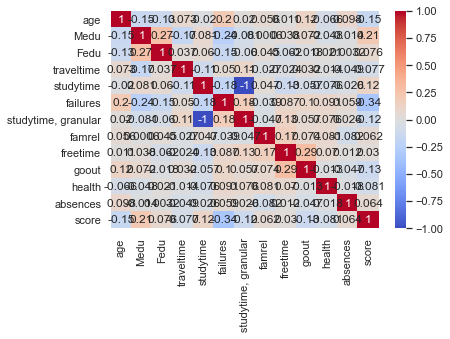

In [1706]:
# отобразим в тепловой карте значений коэффициентов корреляции
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [1707]:
# у колонок studytime и studytime, granular абсолютная отрицательная корреляция,
# поэтому одну колонку, например, studytime, granular можно удалить  

study.drop(['studytime, granular'], axis = 1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
# в нашем датафрейме максимальное кол-во пропусков в столбце 11.4%, поэтому удалять колонку нет оснований,
# Для удаления столбцов, содержащих, скажем,  60% пропусков можно воспользоваться следующей функцией:
col_for_drop = [col for col in df.columns if df[col].isnull().sum()>df[col].shape[0]*0.6]
new_df = df.drop(col_for_drop, axis=1)
new_df.head()

In [1555]:
# Относительно выраженно на итоговые оценки влияет образование матери
# Образование отца тоже сказывается положительно, но в меньшей степени. 
# Так же положительно влияет время на учебу помимо школы.
# Больше всего с итоговыми оценками обратно связано количество внеучебных неудач,
# На этот факт стоит обратить внимание.
# Заметна отрицательная зависимость качества учебы от времени проведенного с друзьями
# С возрастом тоже успеваемость несколько падает.
# Для дальнейшего анализа можно оставить колонки - Medu, goout и failures. 

In [1708]:
# Перейдем к номинативным пееременным
# Посмотрим количество уникальные значений в столбцах address, school, sex, famsize, Pstatus, Mjob,
# Fjob, reason, guardian, schoolsup, paid, famsup, activities, higher, nursery,internet и romantic.
print('address: {}'.format(study.school.unique()))
print('school: {}'.format(study.school.unique()))
print('sex: {}'.format(study.sex.unique()))
print('famsize: {}'.format(study.famsize.unique()))
print('Pstatus: {}'.format(study.Pstatus.nunique()))
print('Mjob: {}'.format(study.Mjob.unique()))
print('Fjob: {}'.format(study.Fjob.unique()))
print('reason: {}'.format(study.reason.unique()))
print('guardian: {}'.format(study.guardian.nunique()))
print('schoolsup: {}'.format(study.schoolsup.unique()))
print('paid: {}'.format(study.paid.unique()))
print('famsup: {}'.format(study.famsup.unique()))
print('activities: {}'.format(study.activities.nunique()))
print('higher: {}'.format(study.higher.unique()))
print('nursery: {}'.format(study.nursery.unique()))
print('internet: {}'.format(study.internet.unique()))
print('romantic: {}'.format(study.romantic.unique()))


address: ['GP' 'MS']
school: ['GP' 'MS']
sex: ['F' 'M']
famsize: [nan 'GT3' 'LE3']
Pstatus: 2
Mjob: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob: ['teacher' 'other' nan 'health' 'services' 'at_home']
reason: ['course' 'other' 'home' 'reputation' nan]
guardian: 3
schoolsup: ['yes' 'no' nan]
paid: ['no' nan 'yes']
famsup: ['no' 'yes' nan]
activities: 2
higher: ['yes' nan 'no']
nursery: ['yes' 'no' nan]
internet: [nan 'yes' 'no']
romantic: ['no' nan 'yes']


In [1709]:

# Количество учащихся в школах
pd.DataFrame(study.school.value_counts())

,school
GP,341
MS,45


In [1710]:
# Количество мальчиков и девочек

pd.DataFrame(study.sex.value_counts())

,sex
F,203
M,183


In [1711]:
# распределение по месту жительства


display(pd.DataFrame(study.address.value_counts()))
print("Значений, встретившихся в столбце более 40 раз:"
      , (study.address.value_counts()>40).sum())
study.loc[:, ['address']].info()


,address
U,290
R,82


Значений, встретившихся в столбце более 40 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  372 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1712]:
# Размер семьи (GT3>3)
# Отфильтруем лишнее

display(pd.DataFrame(study.famsize.value_counts()))
print("Значений, встретившихся в столбце более 30 раз:"
      , (study.famsize.value_counts()>30).sum())
study.loc[:, ['famsize']].info()




,famsize
GT3,253
LE3,106


Значений, встретившихся в столбце более 30 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  359 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1713]:

display(pd.DataFrame(study.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.Pstatus.value_counts()>10).sum())
study.loc[:, ['Pstatus']].info()


,Pstatus
T,307
A,36


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  343 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1714]:
# Работа матери

display(pd.DataFrame(study.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 20 раз:"
      , (study.Mjob.value_counts()>20).sum())
study.loc[:, ['Mjob']].info()


,Mjob
other,125
services,97
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 20 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    367 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1563]:
# Заменим пропуски модой
# study_mode = pd.read_csv('stud_math.xls')
# study_mode.Mjob.fillna(study.Mjob.mode()[0], inplace = True)
# study_mode.Mjob.value_counts()

In [1715]:

# Работа отца

display(pd.DataFrame(study.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.Fjob.value_counts()>10).sum())
study.loc[:, ['Fjob']].info()


,Fjob
other,193
services,97
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    350 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1453]:
# Заменим пропуски модой.
# 
#study_mode = pd.read_csv('stud_math.xls')
#study_mode.Fjob.fillna(study.Fjob.mode()[0], inplace = True)
#study_mode.Fjob.value_counts()

In [1716]:
# Причина выбора школы
# Отфильтруем лишнее

display(pd.DataFrame(study.reason.value_counts()))
print("Значений, встретившихся в столбце более 20 раз:"
      , (study.reason.value_counts()>20).sum())
study.loc[:, ['reason']].info()

,reason
course,135
home,100
reputation,100
other,34


Значений, встретившихся в столбце более 20 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  369 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1717]:
# опекун
# study.guardian = study.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(study.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.guardian.value_counts()>10).sum())
study.loc[:, ['guardian']].info()

,guardian
mother,247
father,84
other,24


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  355 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1718]:
# дополнительная обр поддержка



display(pd.DataFrame(study.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.schoolsup.value_counts()>10).sum())
study.loc[:, ['schoolsup']].info()


,schoolsup
no,329
yes,48


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  377 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1568]:
# study['schoolsup'].value_counts().index

In [1458]:
# заменим пропуски одним значением
 
#study['schoolsup'].fillna(study['schoolsup'].value_counts().index[0], inplace = True)


In [1719]:
# семейная образовательная поддержка


display(pd.DataFrame(study.famsup.value_counts()))
print("Значений, встретившихся в столбце более 40 раз:"
      , (study.famsup.value_counts()>40).sum())
study.loc[:, ['famsup']].info() 



,famsup
yes,214
no,134


Значений, встретившихся в столбце более 40 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  348 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1720]:
# дополнительные платные занятия по математике
# Отфильтруем лишнее


display(pd.DataFrame(study.paid.value_counts()))
print("Значений, встретившихся в столбце более 40 раз:"
      , (study.paid.value_counts()>40).sum())
study.loc[:, ['paid']].info()

,paid
no,194
yes,153


Значений, встретившихся в столбце более 40 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    347 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1721]:
# дополнительные внеучебные занятия по математике
# Отфильтруем лишнее



display(pd.DataFrame(study.activities.value_counts()))
print("Значений, встретившихся в столбце более 20 раз:"
      , (study.activities.value_counts()>20).sum())
study.loc[:, ['activities']].info()

,activities
yes,191
no,181


Значений, встретившихся в столбце более 20 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  372 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1722]:
# посещение детского сада
# Отфильтруем лишнее


display(pd.DataFrame(study.nursery.value_counts()))
print("Значений, встретившихся в столбце более 20 раз:"
      , (study.nursery.value_counts()>20).sum())
study.loc[:, ['nursery']].info()

,nursery
yes,294
no,77


Значений, встретившихся в столбце более 20 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  371 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1723]:
#  хочет ли получить высшее образование

display(pd.DataFrame(study.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (study.higher.value_counts()>10).sum())
study.loc[:, ['higher']].info()



,higher
yes,348
no,18


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  366 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1464]:
#study['higher'].value_counts().index

In [1465]:
# заменим пропуски одним значением
#study['higher'].fillna(study['higher'].value_counts().index[0], inplace = True)


In [1724]:
# наличие интернета
# Отфильтруем лишнее


display(pd.DataFrame(study.internet.value_counts()))
print("Значений, встретившихся в столбце более 40 раз:"
      , (study.internet.value_counts()>40).sum())
study.loc[:, ['internet']].info()

,internet
yes,299
no,54


Значений, встретившихся в столбце более 40 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  353 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1725]:
# романтические отношения
# Отфильтруем лишнее


display(pd.DataFrame(study.romantic.value_counts()))
print("Значений, встретившихся в столбце более 40 раз:"
      , (study.romantic.value_counts()>40).sum())
study.loc[:, ['romantic']].info()

,romantic
no,233
yes,123


Значений, встретившихся в столбце более 40 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  356 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [1726]:
# Проанализируем номинативные переменные с помощью box-plot

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=study.loc[study.loc[:, column].isin(study.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

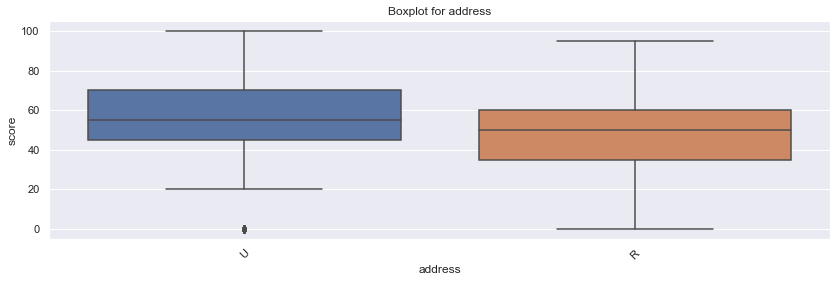

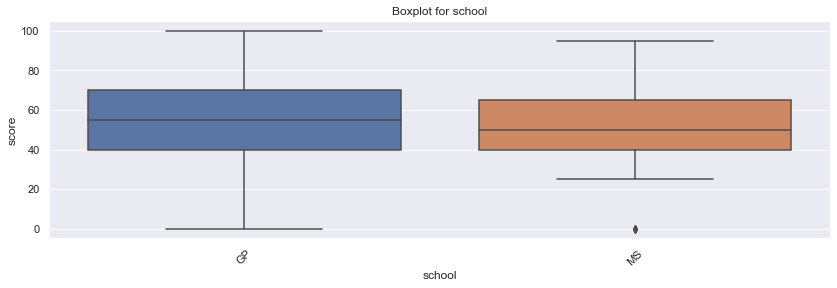

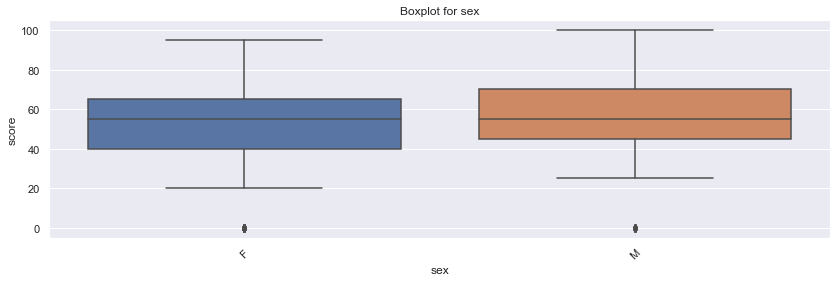

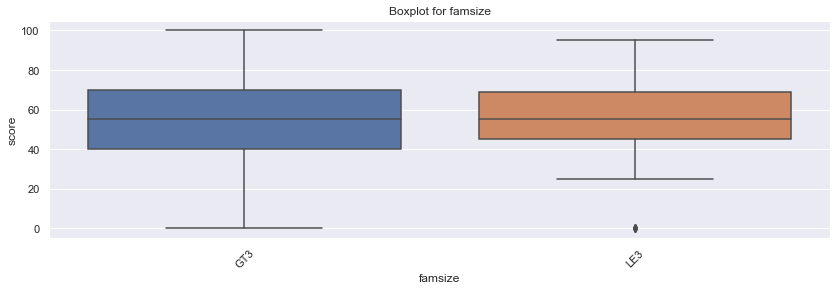

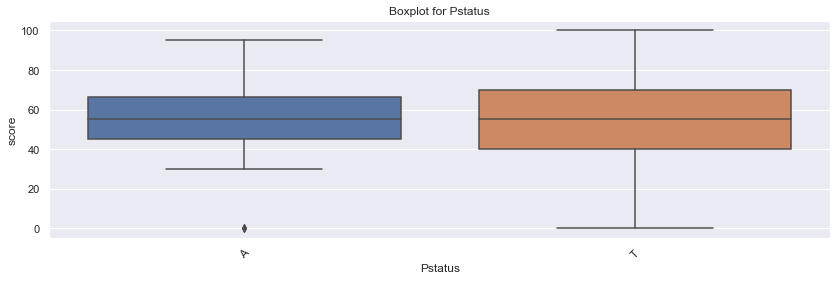

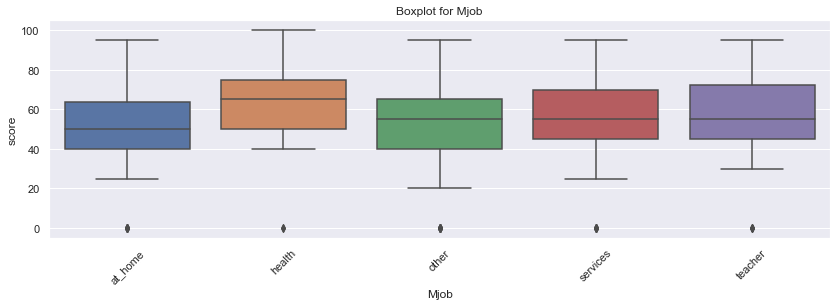

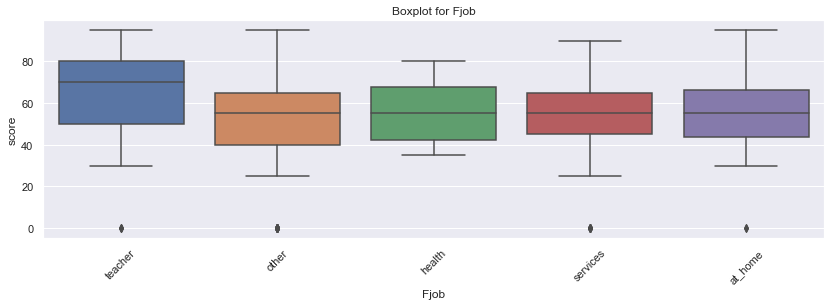

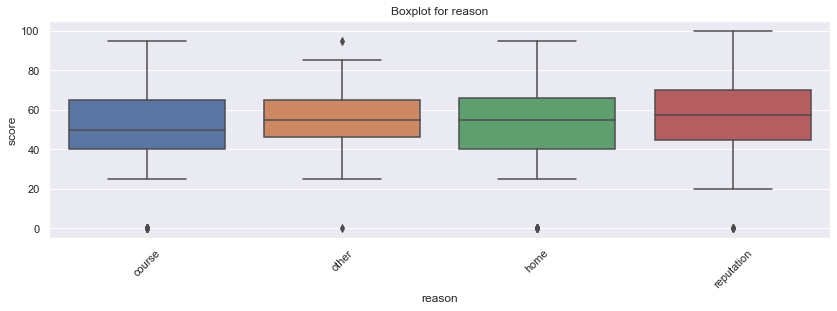

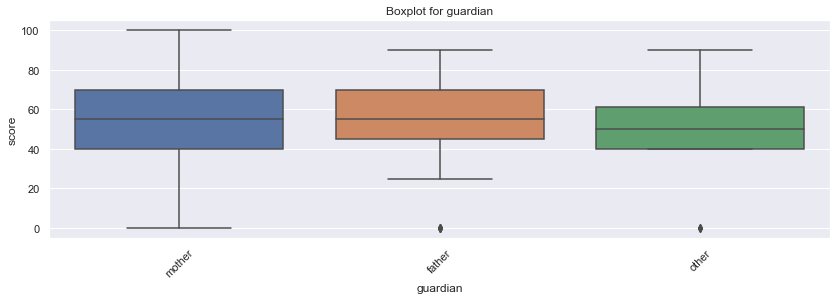

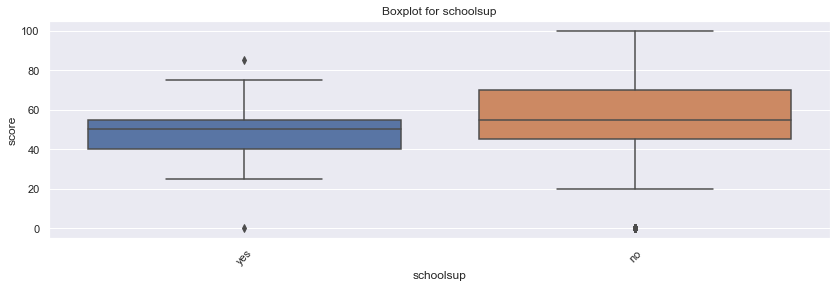

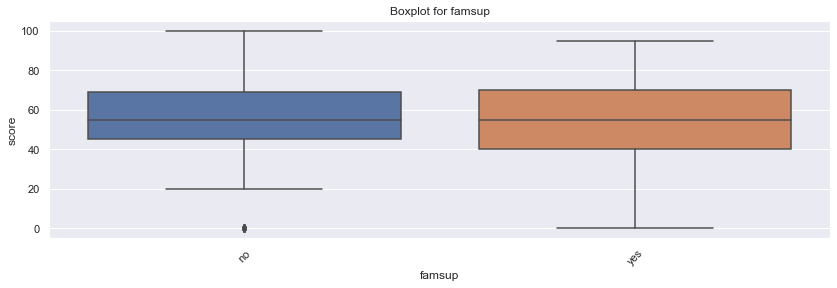

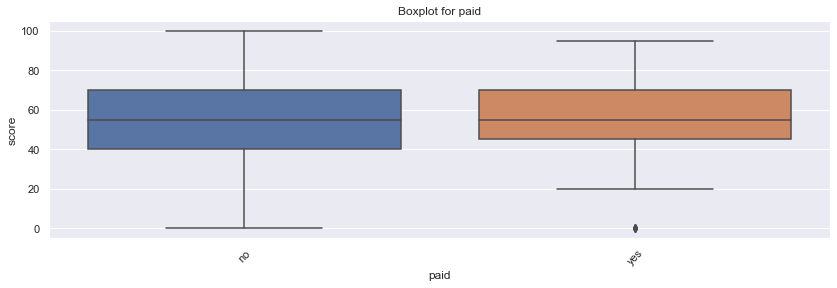

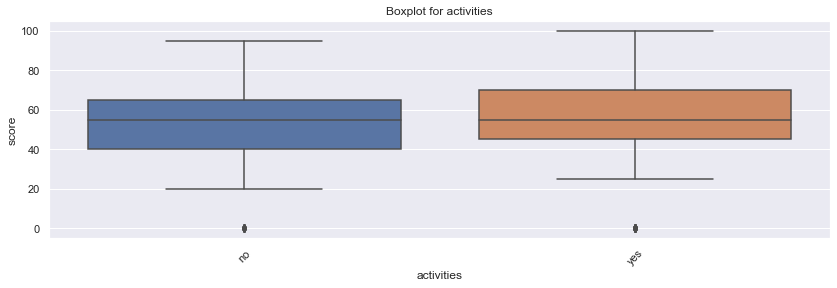

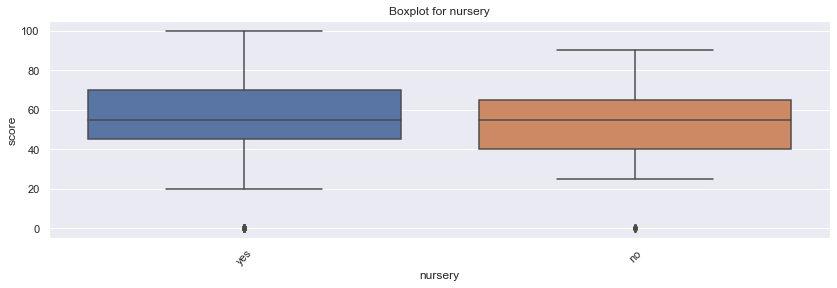

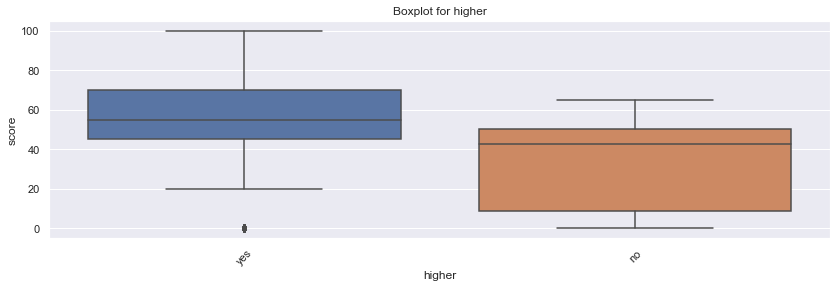

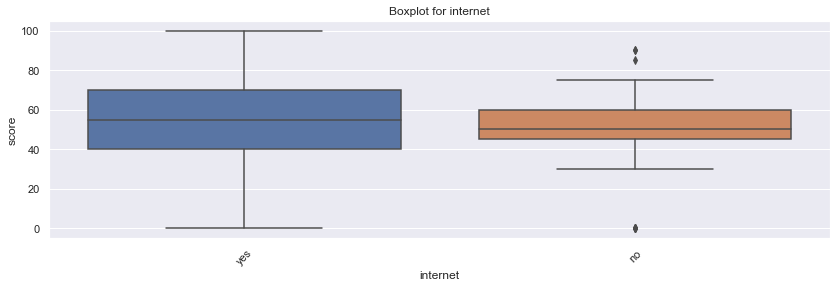

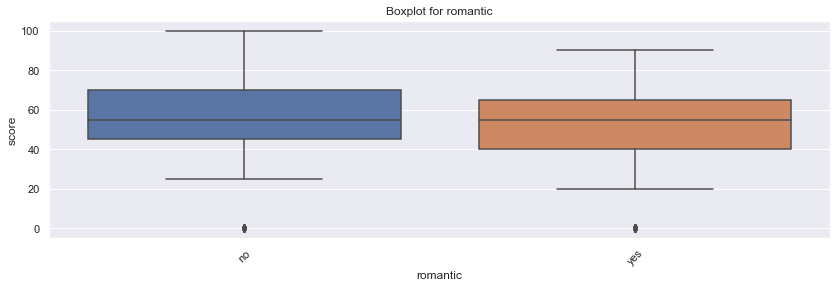

In [1727]:
for col in ['address', 'school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [1728]:
# Можно заметить, что дети городских жителей учатся чуть лучше.
# Бросается в глаза, что дети учатся значительно лучше других если мать врач или отец учитель.
# Те кто выбирал школу по репутации тоже учатся заметно лучше. 
# Чуть хуже других учатся дети в семьях с опекуном.
# Положительно влияет на образование дополнительная образовательная поддержка.
# Сильно коррелирует с успехами на экзаменах желание получить высшее образование.
# Романтичные отношения чуть подтормаживают успеваемость.
# Судя по диаграммам можно оставить address, Mjob, Fjob, schoolsup, guardian и higher 
# Проверим эти выводы с помощью статистики.

def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'], 
                        study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [1729]:
#  Проверка выдала неожиданный результат. В выборку не вошли колонки :
# Fjob, schoolsup и guardian и вошли те которые я не ждал - romantic, sex
for col in ['address', 'school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [1582]:
# Посмотрим по всему датасету.  
# Подтвердился вывод о значимости колонок Medu, failures, goout,неожиданно добавился absences.
# Странно что не подтверждается статистически значимость колонки Fjob, метод box-plot ее явно выделил. 
for col in ['address', 'school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'absences', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeW

In [ ]:
# Посмотрим еще раз на переменную Fjob с помощью sns.boxplot

<AxesSubplot:xlabel='Fjob', ylabel='score'>

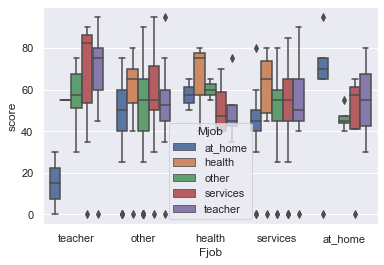

In [1730]:
# !!! Отец учитель и мать работает в сфере услуг (медианный балл выше 80)
# Отец учитель и мать учитель или врач (балл ~75)
# В семье где отец учитель а мать не работает результаты учебы очень слабые
sns.boxplot(x = 'Fjob', y = 'score', data = study, hue = 'Mjob')

<AxesSubplot:xlabel='Fjob', ylabel='score'>

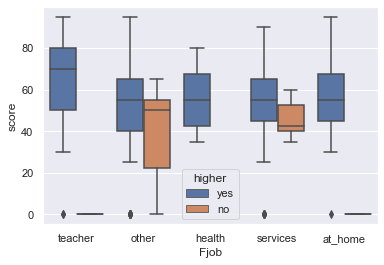

In [1731]:
# ! Если отец учитель и есть желание получить образование ( балл по экзамену ~ 70)

sns.boxplot(x = 'Fjob', y = 'score', data = study, hue = 'higher')

In [1732]:
# Оценки на экзамене если отец учитель.
print(study.loc[study['Fjob'] == 'teacher']['score'].median())
print(study.loc[study['Fjob'] == 'teacher']['score'].mean())

70.0
59.827586206896555


<AxesSubplot:xlabel='goout', ylabel='score'>

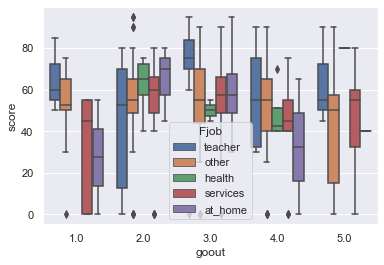

In [1733]:
# Тоже явная зависимость от места работы отца
sns.boxplot(x = 'goout', y = 'score', data = study, hue = 'Fjob')

<AxesSubplot:xlabel='Medu', ylabel='score'>

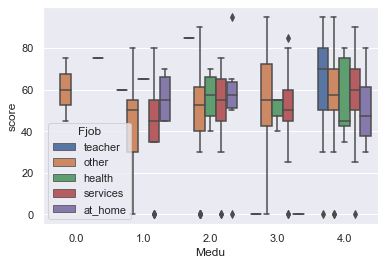

In [1734]:
# мать с высшим образованием  и отец учитель (~72)
sns.boxplot(x = 'Medu', y = 'score', data = study, hue = 'Fjob')

<AxesSubplot:xlabel='romantic', ylabel='score'>

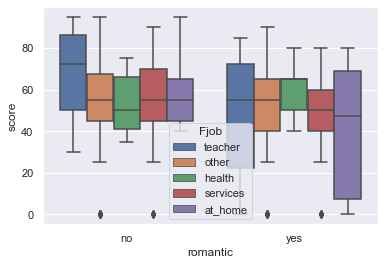

In [1735]:
sns.boxplot(x = 'romantic', y = 'score', data = study, hue = 'Fjob')

<AxesSubplot:xlabel='goout', ylabel='score'>

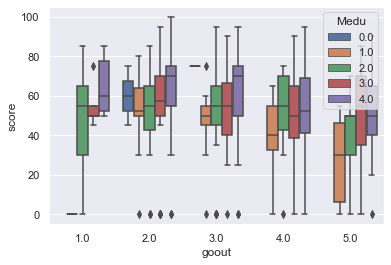

In [1771]:
# Мать с образованием начальных классов и много времени с друзьями приводят по факту к слабым знаниям
sns.boxplot(x = 'goout', y = 'score', data = study, hue = 'Medu')

<AxesSubplot:xlabel='failures', ylabel='score'>

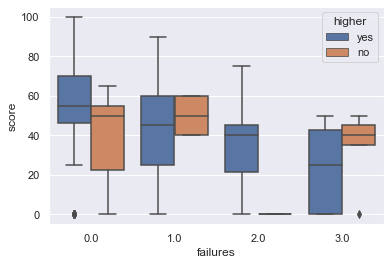

In [1776]:
# наличие внеучебных неудач плохо влияет даже на фоне стремления к образованию
sns.boxplot(x = 'failures', y = 'score', data = study, hue = 'higher')

<AxesSubplot:xlabel='failures', ylabel='score'>

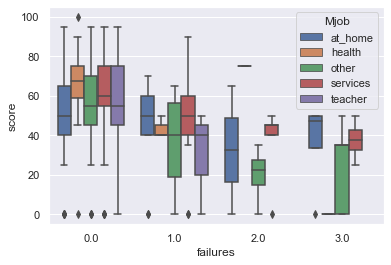

In [1779]:
# Внеучебные неудачи если мать разнорабочая тоже не дают хороших результатов.
sns.boxplot(x = 'failures', y = 'score', data = study, hue = 'Mjob')

<AxesSubplot:xlabel='sex', ylabel='score'>

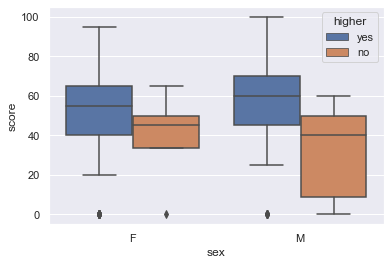

In [1780]:
# Девочки слабее в учебе, особенно не стремящиеся к образованию
sns.boxplot(x = 'sex', y = 'score', data = study, hue = 'higher')

<AxesSubplot:xlabel='romantic', ylabel='score'>

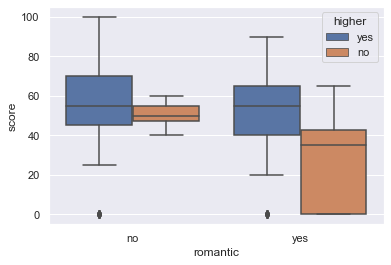

In [1794]:
# Роматичные отношения ухудшают успеваемость, особенно,  тем кто не собирается учиться дальше
sns.boxplot(x = 'romantic', y = 'score', data = study, hue = 'higher')

<AxesSubplot:xlabel='higher', ylabel='score'>

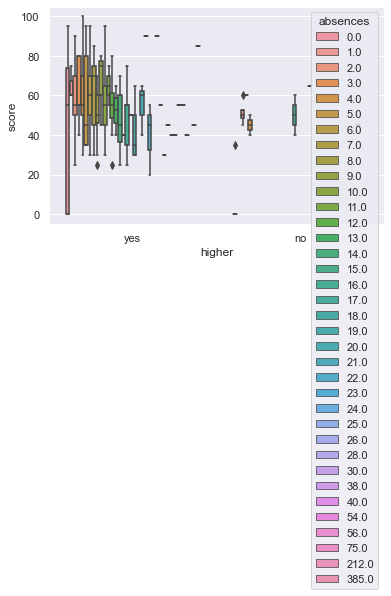

In [1795]:
sns.boxplot(x = 'higher', y = 'score', data = study, hue = 'absences')

<AxesSubplot:xlabel='higher', ylabel='score'>

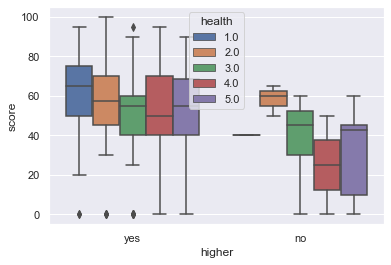

In [1796]:
# Этот график показывает явную зависимость успеваемости от здоровья, но в мои выборки здоровье не попало...
sns.boxplot(x = 'higher', y = 'score', data = study, hue = 'health')

In [1018]:
# Можно перекодировать данные.


In [1736]:
study['address'].value_counts().index

Index(['U', 'R'], dtype='object')

In [1737]:
def encoding_address(address_encoding):
    if address_encoding == 'U':
        return 0
    if address_encoding == 'R':
        return 1
    
study['address'].apply(encoding_address)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
390    0.0
391    0.0
392    1.0
393    1.0
394    0.0
Name: address, Length: 386, dtype: float64

In [1738]:
study['school'].value_counts().index

Index(['GP', 'MS'], dtype='object')

In [1739]:
def encoding_school(school_encoding):
    if school_encoding == 'GP':
        return 0
    if school_encoding == 'MS':
        return 1
    
study['school'].apply(encoding_school)

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: school, Length: 386, dtype: int64

In [1740]:
study['sex'].value_counts().index

Index(['F', 'M'], dtype='object')

In [1741]:
def encoding_sex(sex_encoding):
    if sex_encoding == 'F':
        return 0
    if sex_encoding == 'M':
        return 1
    
study['sex'].apply(encoding_sex)

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: sex, Length: 386, dtype: int64

In [1742]:
study['famsize'].value_counts().index

Index(['GT3', 'LE3'], dtype='object')

In [1743]:
def encoding_famsize(famsize_encoding):
    if famsize_encoding == 'GT3':
        return 0
    if famsize_encoding == 'LE3':
        return 1
study['famsize'].apply(encoding_famsize)

0      NaN
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
390    1.0
391    1.0
392    0.0
393    1.0
394    1.0
Name: famsize, Length: 386, dtype: float64

In [1744]:
study['Pstatus'].value_counts().index

Index(['T', 'A'], dtype='object')

In [1745]:
def encoding_pstatus(pstatus_encoding):
    if pstatus_encoding == 'T':
        return 0
    if pstatus_encoding == 'A':
        return 1
    
study['Pstatus'].apply(encoding_pstatus)

0      1.0
1      NaN
2      0.0
3      0.0
4      0.0
      ... 
390    1.0
391    0.0
392    0.0
393    0.0
394    0.0
Name: Pstatus, Length: 386, dtype: float64

In [1746]:
study['Mjob'].value_counts().index

Index(['other', 'services', 'at_home', 'teacher', 'health'], dtype='object')

In [1747]:
def encoding_Mjob(Mjob_encoding):
    if Mjob_encoding == 'other':
        return 0
    if Mjob_encoding == 'services':
        return 1
    if Mjob_encoding == 'at_home':
        return 2
    if Mjob_encoding == 'teacher':
        return 3
    if Mjob_encoding == 'health':
        return 4
study['Mjob'].apply(encoding_Mjob)

0      2.0
1      2.0
2      2.0
3      4.0
4      0.0
      ... 
390    1.0
391    1.0
392    0.0
393    1.0
394    0.0
Name: Mjob, Length: 386, dtype: float64

In [1748]:
study['Fjob'].value_counts().index

Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object')

In [1749]:
def encoding_Fjob(Fjob_encoding):
    if Fjob_encoding == 'other':
        return 0
    if Fjob_encoding == 'services':
        return 1
    if Fjob_encoding == 'teacher':
        return 2
    if Fjob_encoding == 'at_home':
        return 3
    if Fjob_encoding == 'health':
        return 4
study['Fjob'].apply(encoding_Fjob)

0      2.0
1      0.0
2      0.0
3      NaN
4      0.0
      ... 
390    1.0
391    1.0
392    0.0
393    0.0
394    3.0
Name: Fjob, Length: 386, dtype: float64

In [1750]:
study['reason'].value_counts().index

Index(['course', 'home', 'reputation', 'other'], dtype='object')

In [1751]:
def encoding_reason(reason_encoding):
    if reason_encoding == 'course':
        return 0
    if reason_encoding == 'reputation':
        return 1
    if reason_encoding == 'home':
        return 2
    if reason_encoding == 'other':
        return 3 
study['reason'].apply(encoding_reason)

0      0.0
1      0.0
2      3.0
3      2.0
4      2.0
      ... 
390    0.0
391    0.0
392    0.0
393    0.0
394    NaN
Name: reason, Length: 386, dtype: float64

In [1752]:
study['guardian'].value_counts().index

Index(['mother', 'father', 'other'], dtype='object')

In [1753]:
def encoding_guardian(guardian_encoding):
    if guardian_encoding == 'mother':
        return 0
    if guardian_encoding  == 'father':
        return 1
    if guardian_encoding == 'other':
        return 2
study['guardian'].apply(encoding_guardian)

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
390    NaN
391    0.0
392    NaN
393    0.0
394    1.0
Name: guardian, Length: 386, dtype: float64

In [1754]:
study['schoolsup'].value_counts().index

Index(['no', 'yes'], dtype='object')

In [1755]:
def encoding_schoolsup(schoolsup_encoding):
    if schoolsup_encoding == 'no':
        return 0
    if schoolsup_encoding == 'yes':
        return 1
study['schoolsup'].apply(encoding_schoolsup)

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
390    0.0
391    0.0
392    NaN
393    0.0
394    NaN
Name: schoolsup, Length: 386, dtype: float64

In [1756]:
study['paid'].value_counts().index

Index(['no', 'yes'], dtype='object')

In [1757]:
def encoding_paid(paid_encoding):
    if paid_encoding == 'no':
        return 0
    if paid_encoding == 'yes':
        return 1
    
study['paid'].apply(encoding_paid)

0      0.0
1      0.0
2      NaN
3      1.0
4      1.0
      ... 
390    1.0
391    0.0
392    0.0
393    0.0
394    0.0
Name: paid, Length: 386, dtype: float64

In [1758]:
study['famsup'].value_counts().index

Index(['yes', 'no'], dtype='object')

In [1759]:
def encoding_famsup(famsup_encoding):
    if famsup_encoding == 'yes':
        return 0
    if famsup_encoding == 'no':
        return 1
study['famsup'].apply(encoding_famsup)

0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
390    0.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: famsup, Length: 386, dtype: float64

In [1760]:
study['activities'].value_counts().index

Index(['yes', 'no'], dtype='object')

In [1761]:
def encoding_activities(activities_encoding):
    if activities_encoding == 'yes':
        return 0
    if activities_encoding == 'no':
        return 1
    
study['activities'].apply(encoding_activities)

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
390    1.0
391    1.0
392    1.0
393    NaN
394    1.0
Name: activities, Length: 386, dtype: float64

In [1762]:
study['higher'].value_counts().index

Index(['yes', 'no'], dtype='object')

In [1763]:
def encoding_higher(higher_encoding):
    if higher_encoding == 'yes':
        return 0
    if higher_encoding == 'no':
        return 1
    
study['higher'].apply(encoding_higher)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
390    0.0
391    0.0
392    NaN
393    0.0
394    0.0
Name: higher, Length: 386, dtype: float64

In [1764]:
study['nursery'].value_counts().index

Index(['yes', 'no'], dtype='object')

In [1765]:
def encoding_nursery(nursery_encoding):
    if nursery_encoding == 'yes':
        return 0
    if nursery_encoding == 'no':
        return 1
study['nursery'].apply(encoding_nursery)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
390    0.0
391    1.0
392    1.0
393    1.0
394    0.0
Name: nursery, Length: 386, dtype: float64

In [1766]:
study['internet'].value_counts().index

Index(['yes', 'no'], dtype='object')

In [1767]:
def encoding_internet(internet_encoding):
    if internet_encoding == 'yes':
        return 0
    if internet_encoding == 'no':
        return 1
    
study['internet'].apply(encoding_internet)

0      NaN
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
390    1.0
391    0.0
392    1.0
393    0.0
394    0.0
Name: internet, Length: 386, dtype: float64

In [1768]:
study['romantic'].value_counts().index

Index(['no', 'yes'], dtype='object')

In [1769]:
def encoding_romantic(romantic_encoding):
    if romantic_encoding == 'no':
        return 0
    if romantic_encoding == 'yes':
        return 1
study['romantic'].apply(encoding_romantic)

0      0.0
1      0.0
2      NaN
3      1.0
4      0.0
      ... 
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
Name: romantic, Length: 386, dtype: float64

In [ ]:

# Таким образом, для построения модели можно оставить 10 столбцов:
# address, sex, Mjob, higher, romantic, absences, Medu, failures, goout, Fjob. Хотя зависимость 
# успешности учебы от количества пропущенных занятий не кажется очевидной, а состояние здоровья кажется.